In [1]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.cm as cm

import seaborn as sns
import matplotlib as mpl
mpl.style.use('default')

#for simple fitting
import scipy.integrate as spi

%matplotlib inline


In [2]:
#import data
long_df=pd.read_csv('data/long_df.csv')
long_df_wtot=pd.read_csv('data/long_df_wtot.csv')
more_correlates=pd.read_csv('data/more_correlates.csv')

#define some constant names

celltypes=['TN', 'TSCM','TCM', 'TTM','TEM'] #cell type names

monolix_state_names=['T10_SAEM','T20_SAEM','T30_SAEM','T40_SAEM','T50_SAEM']
#monolix_state_names=['T10_mode','T20_mode','T30_mode','T40_mode','T50_mode']
monolix_param_names=['th1_SAEM','th2_SAEM','th3_SAEM','th4_SAEM','th5_SAEM']
#monolix_param_names=['th1_mode','th2_mode','th3_mode','th4_mode','th5_mode']

cellcolors=['deepskyblue','green','gold','orange','crimson']
cellnames=['$\mathrm{T_N}$','$\mathrm{T_{SCM}}$','$\mathrm{T_{CM}}$','$\mathrm{T_{TM}}$','$\mathrm{T_{EM}}$']

mname='modeling5corrected_subfrac_nodiff'

In [3]:

#info for monolix model
param_df=pd.read_csv('../monolix/'+mname+'/IndividualParameters/estimatedIndividualParameters.txt')
param_df.head()

,id,T10_SAEM,T20_SAEM,T30_SAEM,T40_SAEM,T50_SAEM,th1_SAEM,th2_SAEM,th3_SAEM,th4_SAEM,...,T10_sd,T20_sd,T30_sd,T40_sd,T50_sd,th1_sd,th2_sd,th3_sd,th4_sd,th5_sd
0,3693,44.9973,172.826,213.752,339.869,366.507,0.176357,-0.163062,0.530384,-0.046324,...,35.9206,103.554,79.1337,101.1790,126.448,0.297916,0.297064,0.175179,0.114713,0.132593
1,2641,42.8142,148.904,229.788,472.954,555.121,0.144816,-0.513424,-0.183203,-0.103273,...,30.7475,54.041,54.2401,75.6631,110.109,0.274246,0.271682,0.175319,0.105671,0.139537
2,2609,176.3380,391.036,730.542,1499.950,1968.940,0.083909,-0.088330,0.053663,-0.083743,...,127.3140,277.851,241.7550,359.3420,541.686,0.399457,0.341900,0.280739,0.148330,0.177073
3,2647,662.6110,1006.100,2596.850,3814.490,5022.250,0.072237,0.139537,0.163941,0.061928,...,383.6800,408.762,741.7380,831.1240,1348.240,0.405144,0.225986,0.173236,0.106341,0.128346
4,2531,22.8399,258.661,324.677,778.873,993.070,0.073416,0.157235,-0.044723,-0.009333,...,16.0758,162.054,129.6250,193.0330,278.566,0.294162,0.309734,0.222473,0.125297,0.143045


In [7]:
#poparmH = pd.read_csv('../monolix2/SX_1nodiff/populationParameters.txt')
poparmS = pd.read_csv('../monolix2/SX_1nodiff/populationParameters.txt')

poparmS['wald'] = poparmS['value']-1.96*poparmS['se_lin']

poparmS

,parameter,value,se_lin,rse_lin,wald
0,T10_pop,24.015648,2.180473,9.079384,19.741921
1,T20_pop,1.017031,0.122837,12.078037,0.776270
2,T30_pop,26.321920,1.284878,4.881398,23.803560
3,T40_pop,18.018736,1.021963,5.671670,16.015688
4,T50_pop,7.315563,0.619889,8.473560,6.100581
5,th1_pop,0.044350,0.014373,32.408723,0.016178
6,th2_pop,-0.030312,0.022466,74.114939,-0.074345
7,th3_pop,0.016685,0.013693,82.065109,-0.010152
8,th4_pop,0.007233,0.015482,214.040189,-0.023111
9,th5_pop,-0.033144,0.022103,66.688451,-0.076465


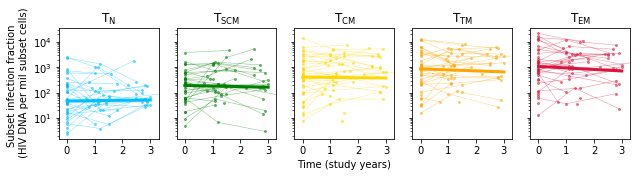

In [4]:
#plot all subset data relative to study initiation

fig,axarr=plt.subplots(1,5,figsize=(9,2.5),sharex=True,sharey=True)
sim_t = np.linspace(0,3,100)
for ic,ct in enumerate(celltypes):
    ax=axarr[ic]
    for ip,p in enumerate(long_df['pat_id'].unique()):
        tdf=long_df[(long_df['pat_id']==p) & (long_df['celltype']==ct)]
        ax.semilogy(tdf['time_postART_years']-tdf['time_postART_years'].iloc[0],tdf['DNApmsub'],
                    ls='-',marker='o',lw=0.5,markersize=2,alpha=0.5,color=cellcolors[ic])#cz_list[pind])

    avgT0 = np.median(param_df['T'+str(ic+1)+'0_mode'])
    avg_k = np.median(param_df['th'+str(ic+1)+'_mode'])
    ax.plot(sim_t,avgT0*np.exp(avg_k*sim_t),lw=3,color=cellcolors[ic])
        
    ax.set_title(cellnames[ic])

axarr[2].set_xlabel('Time (study years)')
axarr[0].set_ylabel('Subset infection fraction \n (HIV DNA per mil subset cells)')
axarr[0].set_xticks(range(5))
axarr[0].set_xlim([-0.3,3.3])

plt.tight_layout()    
plt.savefig('figures/subfrac_studyyears.pdf',dpi=600)

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


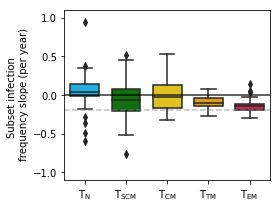

In [6]:
#look at net clearance rates
mypal = dict(zip(monolix_param_names,cellcolors))
plt.figure(figsize=(4,3))
sns.boxplot(param_df[monolix_param_names],width=0.7,palette=mypal)
plt.axhline(0,color='k',alpha=0.8)
plt.axhline(-0.2,color='gray',ls='--',alpha=0.5)
plt.xlim([-.5,4.5])
plt.xticks(range(5),cellnames)
#plt.xticks(range(1,7),celltypes)
plt.ylabel('Subset infection \n frequency slope (per year)')
plt.ylim([-1.1,1.1])
plt.tight_layout()

plt.savefig('figures/subfrac_rates_box2.pdf',dpi=600)


Ttest_1sampResult(statistic=0.9773702087309007, pvalue=0.3349084153084989)
Ttest_1sampResult(statistic=-1.8077356342079844, pvalue=0.07900912392427721)
Ttest_1sampResult(statistic=0.07680329695445262, pvalue=0.9392052955098034)
Ttest_1sampResult(statistic=-6.871982971740201, pvalue=4.835463209325632e-08)
Ttest_1sampResult(statistic=-9.020900902833906, pvalue=9.044070851823167e-11)


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


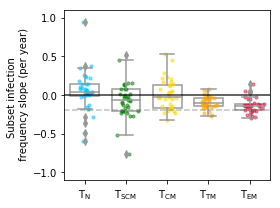

In [13]:
#look at net clearance rates
plt.figure(figsize=(4,3))
jit=0.1
for i in range(5):
    plt.scatter(np.random.normal(i,jit,len(param_df)),param_df[monolix_param_names[i]],s=10,color=cellcolors[i],alpha=0.5)
    print(st.ttest_1samp(param_df[monolix_param_names[i]],popmean=0))
sns.boxplot(param_df[monolix_param_names],width=0.7,color='white')
plt.axhline(0,color='k',alpha=0.8)
plt.axhline(-0.2,color='gray',ls='--',alpha=0.5)
plt.xlim([-.5,4.5])
plt.xticks(range(5),cellnames)
#plt.xticks(range(1,7),celltypes)
plt.ylabel('Subset infection \n frequency slope (per year)')
plt.ylim([-1.1,1.1])
plt.tight_layout()

plt.savefig('figures/subfrac_rates_box3.pdf',dpi=600)


th1_SAEM th4_SAEM 0.003938071508547261
th1_SAEM th5_SAEM 0.0002291489437058184
th3_SAEM th5_SAEM 0.0002094249588132243
th4_SAEM th1_SAEM 0.003938071508547261
th5_SAEM th1_SAEM 0.0002291489437058184
th5_SAEM th3_SAEM 0.0002094249588132243


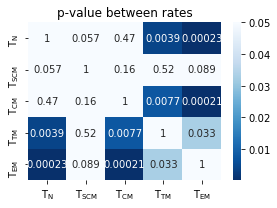

In [17]:
ar=np.zeros([5,5])
for ip1,pp1 in enumerate(['th1_SAEM','th2_SAEM','th3_SAEM','th4_SAEM','th5_SAEM']):
    for ip2,pp2 in enumerate(['th1_SAEM','th2_SAEM','th3_SAEM','th4_SAEM','th5_SAEM']):
        u,pval=st.ttest_ind(param_df[pp1],param_df[pp2],equal_var=False)
        if pval<0.005:
            print(pp1,pp2,pval)
        ar[ip1,ip2]=pval
        
plt.figure(figsize=(4,3))
sns.heatmap(ar,vmax=0.05,annot=True,cmap='Blues_r') #set the bonferroni threshold
plt.xticks(np.arange(5)+0.5,cellnames)
plt.yticks(np.arange(5)+0.5,np.flipud(cellnames),rotation=90)
plt.title('p-value between rates')
plt.tight_layout()

In [7]:
#look at average half life in months, negative means growing!
-np.log(2)/param_df[monolix_param_names].mean()*12

th1_SAEM    -202.133699
th2_SAEM     122.603641
th3_SAEM   -3409.966817
th4_SAEM      88.847630
th5_SAEM      60.189364
dtype: float64

In [22]:
for i in range(5):
    print(-np.log(2)/(np.mean(param_df[monolix_param_names[i]])-2*np.std(param_df[monolix_param_names[i]]))*12,
          -np.log(2)/(np.mean(param_df[monolix_param_names[i]])+2*np.std(param_df[monolix_param_names[i]]))*12)

17.923078225370748 -15.22338138009689
16.05150735089039 -21.745410252064033
21.96530851437507 -21.68592860380699
32.35268913935148 -119.06344989947108
25.829639240544402 -182.25720901595173


In [23]:
more_correlates['id']=more_correlates['HOPE ID'] #to make the merge easier


In [24]:
#update all correlates further

corrdl1 = []

lct_names=''
for ip,p in enumerate(long_df['pat_id'].unique()):
    lct=[]
    lct_names=[]
    for ic,ct in enumerate(celltypes):
    
        tdf=long_df[(long_df['pat_id']==p) & (long_df['celltype']==ct)]
    
        tpre, TRECs, Gini, Age, chl, IL7, IL15 = tdf[['preART_months','TRECs','GiniInd','Age_years','cellular_hl_days','IL7','IL15']].iloc[0].values

        lct.append(chl)
        lct.append(Gini)
        lct_names.append(ct+'_hl')
        lct_names.append(ct+'_G')
    
    #tdf2=long_df_wtot[(long_df_wtot['celltype']=='total') & (long_df_wtot['pat_id']==p)]
    corrdl1.append([p,tpre, TRECs,Age,IL7,IL15]+lct)
        
corr1 = pd.DataFrame(corrdl1,columns=['id','preARTmo','TRECs','Age','IL7','IL15']+lct_names)

more_correlates = pd.merge(more_correlates,corr1)

In [25]:
#merge to make the correlation between params and clinical vars
clincorr_df = pd.merge(more_correlates,param_df[monolix_param_names+['id']])

clincorr_df.columns

Index(['HOPE ID', 'CD4/CD8 Ratio Y1', 'CD4 Nadir', 'CD4 T cell count Y1',
       'KT ratio (nM/uM) at Y1', 'id', 'preARTmo', 'TRECs', 'Age', 'IL7',
       'IL15', 'TN_hl', 'TN_G', 'TSCM_hl', 'TSCM_G', 'TCM_hl', 'TCM_G',
       'TTM_hl', 'TTM_G', 'TEM_hl', 'TEM_G', 'th1_SAEM', 'th2_SAEM',
       'th3_SAEM', 'th4_SAEM', 'th5_SAEM'],
      dtype='object')

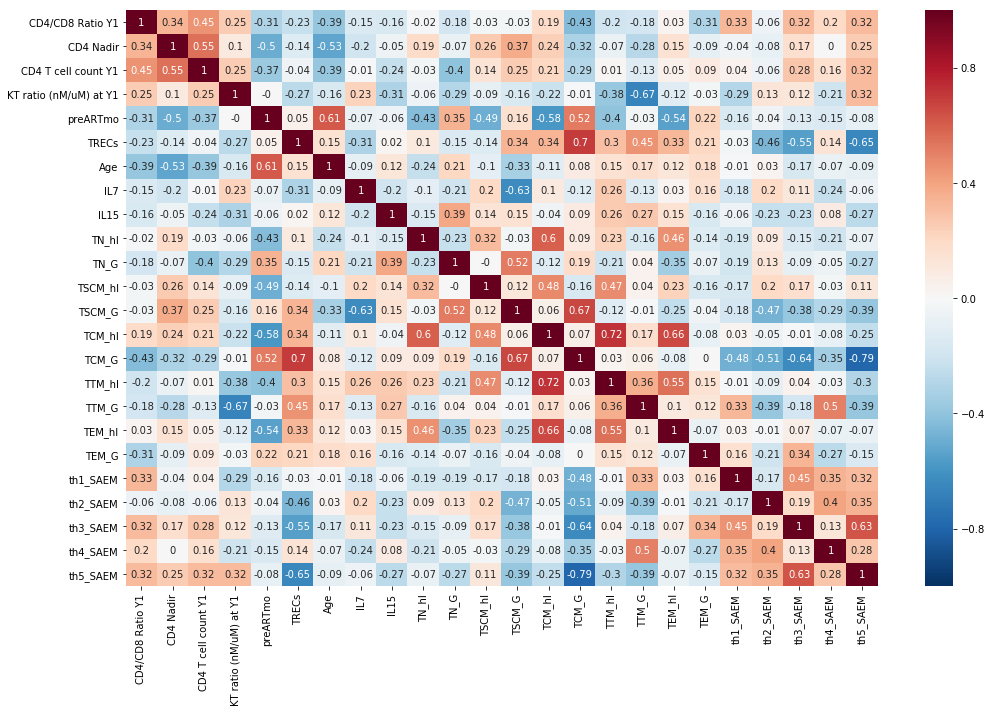

In [26]:
plt.figure(figsize=(15,10))

colz=['CD4/CD8 Ratio Y1', 'CD4 Nadir', 'CD4 T cell count Y1',
       'KT ratio (nM/uM) at Y1', 'preARTmo', 'TRECs', 'Age', 'IL7','IL15',
      'TN_hl', 'TN_G', 'TSCM_hl', 'TSCM_G', 'TCM_hl', 'TCM_G', 'TTM_hl', 'TTM_G',
       'TEM_hl', 'TEM_G', 'th1_SAEM', 'th2_SAEM', 'th3_SAEM', 'th4_SAEM',
       'th5_SAEM']
        
corr_mat = clincorr_df[colz].corr(method='spearman').round(decimals=2)

sns.heatmap(corr_mat,annot=True,vmin=-1,vmax=1)
plt.tight_layout()

plt.savefig('figures/subfrac_clinical_correlates.pdf',dpi=600)


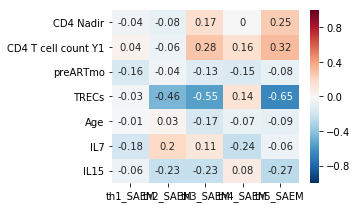

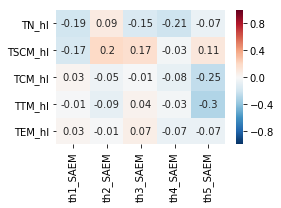

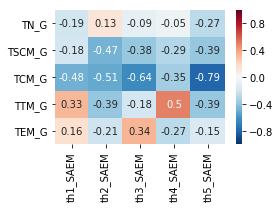

In [27]:
#just agains model parameters
clin_vars1 = ['CD4 Nadir', 'CD4 T cell count Y1', 'preARTmo', 'TRECs', 'Age', 'IL7', 'IL15']
#clin_vars1 = ['CD4/CD8 Ratio Y1', 'CD4 Nadir', 'CD4 T cell count Y1', 'KT ratio (nM/uM) at Y1', 'preARTmo', 'TRECs', 'Age']

clin_vars2 = [ 'TN_hl','TSCM_hl','TCM_hl','TTM_hl','TEM_hl']

clin_vars3 = ['TN_G','TSCM_G','TCM_G','TTM_G','TEM_G']

for icvs,cvs in enumerate([clin_vars1,clin_vars2,clin_vars3]):
    
    if icvs==0:
        plt.figure(figsize=(5,3))
    else:
        plt.figure(figsize=(4,3))
    corr_mat_all = clincorr_df.corr(method='spearman').round(decimals=2)

    sns.heatmap(corr_mat_all.loc[cvs,monolix_param_names],annot=True,vmin=-1,vmax=1)
    plt.tight_layout()


    plt.savefig('figures/subfrac_model_correlates'+str(icvs)+'spearman.pdf',dpi=600)


TRECs th2_SAEM
TRECs th3_SAEM
TRECs th5_SAEM
TCM_G th1_SAEM
TCM_G th2_SAEM
TCM_G th3_SAEM
TCM_G th5_SAEM
TTM_G th4_SAEM


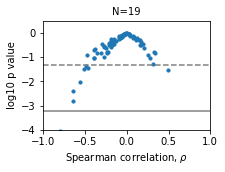

In [28]:
#for bonferroni correction

plt.figure(figsize=(3,2))
rp_l=[]

clin_vars=clin_vars1+clin_vars2+clin_vars3

N=len(clincorr_df.columns)

for cv in clin_vars:
    for mp in monolix_param_names:

        tdf=clincorr_df[[cv,mp]].dropna()
        r,p=st.spearmanr(tdf[cv],tdf[mp])

        rp_l.append([r,p])
        
        if p<0.05:
            print(cv,mp)
            
Bp = 0.05/(len(clin_vars)*len(monolix_param_names)) #Bonferonni p!

rp_arr=np.array(rp_l)
plt.scatter(rp_arr[:,0],np.log10(rp_arr[:,1]),s=10)
plt.xlabel(r'Spearman correlation, $\rho$')
plt.ylabel('log10 p value')
plt.xticks(np.linspace(-1,1,5))
#plt.yticks([0,-2,-5,-10,-20])
plt.ylim([-4,0.5])
plt.axhline(np.log10(0.05),ls='--',color='gray')
plt.axhline(np.log10(Bp),ls='-',color='gray')
plt.title('N='+str(len(tdf)),fontsize=10)
#plt.axvline(0.25,ls='--',color='gray')

plt.savefig('figures/clincorr_pvaluecheckSpearman.pdf',dpi=600)





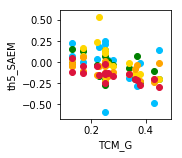

In [29]:
#just look at the TCM gini plot

c1='TCM_G'

plt.figure(figsize=(2,2))
for ic,c2 in enumerate(monolix_param_names):
    plt.scatter(clincorr_df[c1],clincorr_df[c2],color=cellcolors[ic],label=c2)
plt.xlabel(c1)
plt.ylabel(c2)
plt.yticks(np.linspace(-0.5,0.5,5))
#plt.legend()
plt.savefig('figures/subfrac_model_correlates_justGINI.pdf',dpi=600)


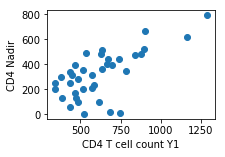

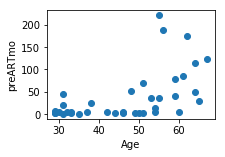

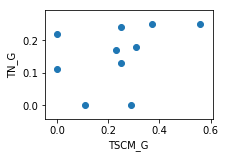

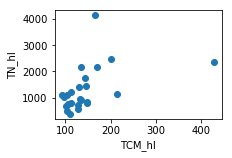

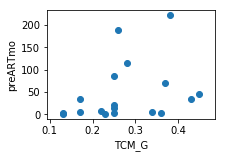

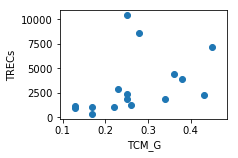

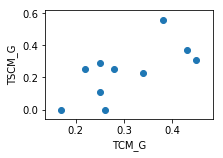

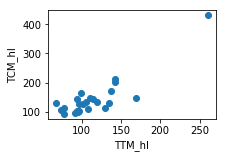

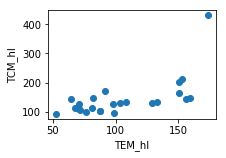

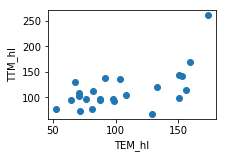

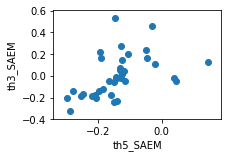

In [30]:
for i1,c1 in enumerate(corr_mat.columns):
    for i2 in range(i1):
        if corr_mat.iloc[i1,i2]>0.5 and corr_mat.iloc[i1,i2]<1:
                
            plt.figure(figsize=(3,2))
            c2=corr_mat.columns[i2]
            plt.scatter(clincorr_df[c1],clincorr_df[c2])
            plt.xlabel(c1)
            plt.ylabel(c2)

In [31]:
#calculate residuals by simulating model

#subfraction model 
def model(X,t,th1,th2,th3,th4,th5):
    dY = np.zeros(5);
    thL=[th1,th2,th3,th4,th5]
    for i in range(len(thL)):
        dY[i]=thL[i]*X[i]
        
    return dY

residuals_l=[]
ir=0
for ip,p in enumerate(long_df['pat_id'].unique()):
    
    tdf=long_df[long_df['pat_id']==p]
    if ~np.isnan(tdf['DNApmsub']).any():
        residuals_l.append([])
                
        tsim=np.linspace(0,3,1000) #simulate over whole interval

        #solve model with initial conditions and model parameters from plist df
        plist=np.array(param_df[param_df['id']==p][monolix_param_names].iloc[0])

        X0=np.array(param_df[param_df['id']==p][monolix_state_names].iloc[0])

        sol=spi.odeint(model, X0, tsim, tuple(plist))

        for ic,ct in enumerate(celltypes):

            #get observation data and plot
            tdf2=tdf[tdf['celltype']==ct]

            #calculate residuals
            t_measured = np.array(tdf2['time_postART_years']-np.min(tdf2['time_postART_years']))
            sim_at_measured_times = np.array([np.log10(sol[np.argmin(np.abs(tsim-t_measured[itt])),ic]) for itt in range(3)])
            residuals = sim_at_measured_times-np.log10(np.array(tdf2['DNApmsub']))

            residuals_l[ir].append(list(tdf2['time_postART_years'])+list(residuals)+list(sim_at_measured_times))
        ir+=1
            


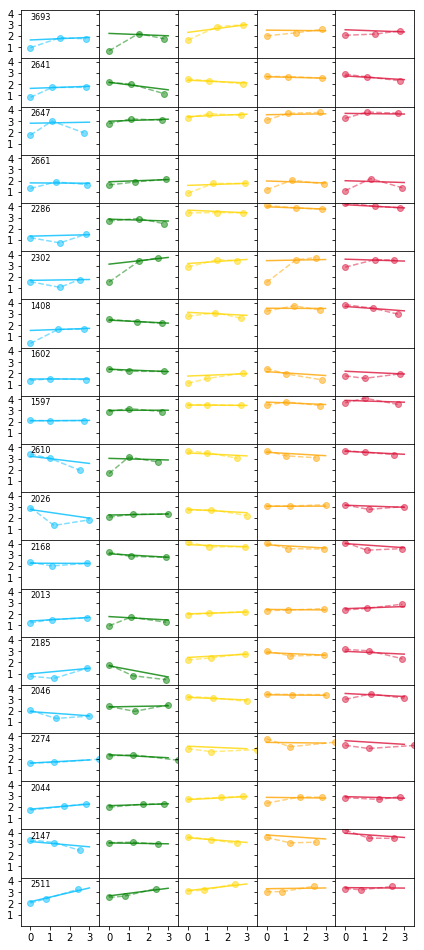

In [32]:
#plot each fit separately relative to trial initiation
#SQUEEZED together into 1 plot

N=19
fig,axarr=plt.subplots(N,len(celltypes),figsize=(6,N*0.7),sharex=True,sharey=True,)

tsim=np.linspace(0,3,1000) #simulate over 3 years

ip=0
pp=0
while ip<N:
    p=long_df['pat_id'].unique()[pp]
    pp+=1
    tdf=long_df[long_df['pat_id']==p]
    if ~np.isnan(tdf['DNApmsub']).any():# and len(tdf)==15: #only plot 3 time opint individuals
                
        #solve model with initial conditions and model parameters from plist df
        plist=np.array(param_df[param_df['id']==p][monolix_param_names].iloc[0])
        X0=np.array(param_df[param_df['id']==p][monolix_state_names].iloc[0])
        sol=spi.odeint(model, X0, tsim, tuple(plist))

        for ic,ct in enumerate(celltypes):

            #get observation data and plot
            tdf2=tdf[tdf['celltype']==ct]

            axarr[ip][ic].plot(tdf2['time_postART_years']-np.min(tdf2['time_postART_years']),np.log10(tdf2['DNApmsub']),
                           marker='o',alpha=0.5,color=cellcolors[ic],ls='--')#,label=p)

            #plot simulations
            axarr[ip][ic].plot(tsim,np.log10(sol[:,ic]),ls='-',alpha=0.8,color=cellcolors[ic])#,label='model')
            #axarr[ic].set_title(celltypes[ic],fontsize=10)
        #axarr[ip][0].set_title(str(p),fontsize=8)
        axarr[ip][0].annotate(str(p),[0,3.5],fontsize=8)
            
        ip+=1
axarr[0][0].set_yticks([1,2,3,4])
axarr[0][0].set_ylim([0,4.3])
axarr[0][0].set_xticks(range(4))
axarr[0][0].set_xlim([-0.5,3.5])
#axarr[0][4].legend(['data','model'])

fig.tight_layout()    
fig.subplots_adjust(wspace=0, hspace=0)

fig.savefig('figures/subsetfreq_fitexamples.pdf',dpi=600)

    #plt.close('all')

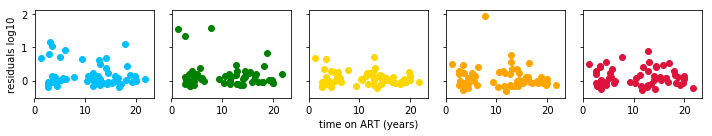

In [33]:
fig,axarr=plt.subplots(1,len(celltypes),figsize=(10,2),sharex=True,sharey=True)
for i in range(len(residuals_l)):
    for ic in range(5):
        axarr[ic].scatter(residuals_l[i][ic][:3],residuals_l[i][ic][3:6],c=cellcolors[ic])
        
axarr[0].set_ylabel('residuals log10')
axarr[2].set_xlabel('time on ART (years)')
plt.tight_layout()

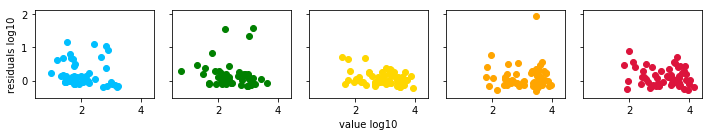

In [34]:
fig,axarr=plt.subplots(1,len(celltypes),figsize=(10,2),sharex=True,sharey=True)
for i in range(len(residuals_l)):
    for ic in range(5):
        axarr[ic].scatter(residuals_l[i][ic][6:],residuals_l[i][ic][3:6],c=cellcolors[ic])
        
axarr[0].set_ylabel('residuals log10')
axarr[2].set_xlabel('value log10')
plt.tight_layout()

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


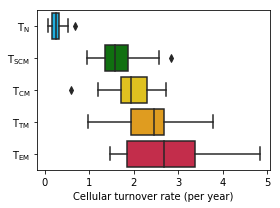

In [35]:
#get turnover rate and plot
rate_df = long_df[~np.isnan(long_df['cellular_hl_days'])]
PIDS=rate_df['pat_id'].unique()

turnrate_l=[]
for pind,p in enumerate(PIDS):
    tdf=rate_df[rate_df['pat_id']==p]
    turnrate = np.log(2)/tdf['cellular_hl_days'].unique()*365
    turnrate_l.append([p]+list(turnrate))
aL_df = pd.DataFrame(turnrate_l,columns=['pid']+celltypes)

plt.figure(figsize=(4,3))
sns.boxplot(aL_df[celltypes],palette=dict(zip(celltypes,cellcolors)),vert=False)
plt.yticks(range(5),cellnames)
plt.xlabel('Cellular turnover rate (per year)')
plt.tight_layout()
plt.savefig('figures/turnover_rates2.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


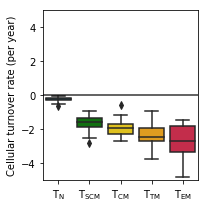

In [36]:
#get turnover rate and plot

plt.figure(figsize=(3,3))
sns.boxplot(-aL_df[celltypes],palette=dict(zip(celltypes,cellcolors)),vert=True)
plt.xticks(range(5),cellnames)
plt.ylabel('Cellular turnover rate (per year)')
plt.axhline(0,color='k',alpha=0.8)

plt.ylim([-5,5])
plt.tight_layout()

plt.savefig('figures/turnover_rates.pdf',dpi=600)


Ttest_1sampResult(statistic=-9.016794962567591, pvalue=5.189619670350176e-09)
Ttest_1sampResult(statistic=-17.573711417810294, pvalue=7.941996679449694e-15)
Ttest_1sampResult(statistic=-18.791830111979543, pvalue=1.8723153082855805e-15)
Ttest_1sampResult(statistic=-18.39495594139137, pvalue=2.970458977928075e-15)
Ttest_1sampResult(statistic=-14.633697552449963, pvalue=3.8359189731010444e-13)


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


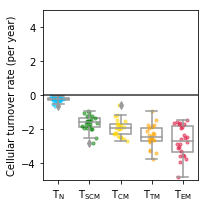

In [40]:
#get turnover rate and plot

plt.figure(figsize=(3,3))
#sns.boxplot(-aL_df[celltypes],palette=dict(zip(celltypes,cellcolors)),vert=True)
for i in range(5):
    plt.scatter(np.random.normal(i,jit,len(aL_df)),-aL_df[celltypes[i]],s=10,color=cellcolors[i],alpha=0.5)
    print(st.ttest_1samp(-aL_df[celltypes[i]],popmean=0))
sns.boxplot(-aL_df[celltypes],width=0.7,color='white')
plt.xticks(range(5),cellnames)
plt.ylabel('Cellular turnover rate (per year)')
plt.axhline(0,color='k',alpha=0.8)

plt.ylim([-5,5])
plt.tight_layout()

plt.savefig('figures/turnover_rates2.pdf',dpi=600)


In [41]:
#this is the ratio of subset decay rate to cell turnover rate
#gets at the question, what fraction of subset decay 

#dfx = rfx * fx
#rfx = replace - turnover
#replace = rfx + turnover

#fraction replaced = replace rate / turnover rate

fX_l=[]
for p in list(aL_df['pid']):
    tX = aL_df[aL_df['pid']==p][celltypes].values[0] #cell turnover rate
    mX = param_df[param_df['id']==p][monolix_param_names].values[0] #subset HIV DNA decay rate

    fX_l.append((mX+tX)*100/tX)


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


F_onewayResult(statistic=0.12358076847268541, pvalue=0.9737407042912953)

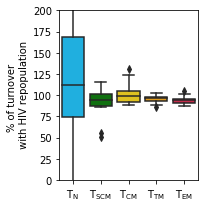

In [42]:
fxdf=pd.DataFrame(np.array(fX_l),columns=celltypes)
                  
plt.figure(figsize=(3,3))
sns.boxplot(fxdf,palette=dict(zip(celltypes,cellcolors)),vert=True)
plt.xticks(range(5),cellnames)
plt.ylabel('% of turnover \n with HIV repopulation')
#plt.semilogy()
plt.ylim([0,200])
#plt.axhline(0,ls='-',color='gray')
#plt.yticks()
plt.tight_layout()
plt.savefig('figures/turnover_HIVfraction.pdf',dpi=600)

st.f_oneway(fxdf['TN'],fxdf['TSCM'],fxdf['TCM'],fxdf['TTM'],fxdf['TEM'])

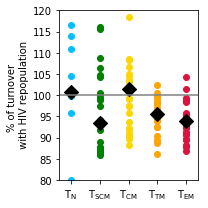

In [139]:
#dots version

plt.figure(figsize=(3,3))
for ic,ct in enumerate(celltypes):
    fX=fxdf[ct].values
    plt.scatter(np.ones(len(fX))*ic,fX,color=cellcolors[ic])
#plt.semilogy()
plt.scatter(np.arange(5),np.mean(fxdf),color='k',s=100,marker='D')
plt.xticks(range(5),cellnames)
plt.ylabel('% of turnover \n with HIV repopulation')
plt.ylim([80,120])
#plt.axhline(100,)
plt.axhline(100,ls='-',color='gray')
plt.tight_layout()
plt.savefig('figures/turnover_HIVfraction.pdf',dpi=600)



Ttest_1sampResult(statistic=0.030279112692937368, pvalue=0.976105670102198)
Ttest_1sampResult(statistic=-2.123365421946857, pvalue=0.0446981277643993)
Ttest_1sampResult(statistic=0.6010527364135074, pvalue=0.5536828853182348)
Ttest_1sampResult(statistic=-5.640228986597346, pvalue=9.670828418311574e-06)
Ttest_1sampResult(statistic=-6.855436664831701, pvalue=5.447120546689077e-07)


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


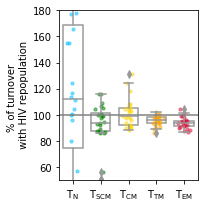

In [48]:
#dots version2

plt.figure(figsize=(3,3))
for i in range(5):
    plt.scatter(np.random.normal(i,jit,len(fxdf)),fxdf[celltypes[i]],s=10,color=cellcolors[i],alpha=0.5)
    print(st.ttest_1samp(fxdf[celltypes[i]],popmean=100))
sns.boxplot(fxdf[celltypes],width=0.7,color='white')
plt.xticks(range(5),cellnames)
plt.ylabel('% of turnover \n with HIV repopulation')
plt.ylim([50,180])
#plt.axhline(100,)
plt.axhline(100,ls='-',color='gray')
plt.tight_layout()
plt.savefig('figures/turnover_HIVfraction2.pdf',dpi=600)



In [140]:
np.mean(fxdf)

TN      100.721681
TSCM     93.411251
TCM     101.354459
TTM      95.454158
TEM      93.888093
dtype: float64

In [141]:
np.std(fxdf)

TN      114.305254
TSCM     14.881343
TCM      10.807304
TTM       3.865285
TEM       4.275683
dtype: float64

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


F_onewayResult(statistic=17.867043607473192, pvalue=1.8949766828945584e-10)

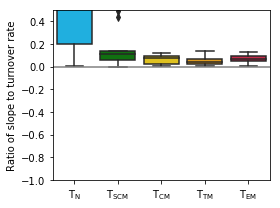

In [24]:
#restrict to positive values

fxdf=pd.DataFrame(np.array(fX_l),columns=celltypes)
   
fxdfpos=fxdf[fxdf>0]

plt.figure(figsize=(4,3))
sns.boxplot(fxdfpos,palette=dict(zip(celltypes,cellcolors)),vert=True)
plt.xticks(range(5),cellnames)
plt.ylabel('Ratio of slope to turnover rate')
plt.ylim([-1,0.5])
plt.axhline(0,ls='-',color='gray')
plt.tight_layout()
plt.savefig('figures/turnover_HIVfraction_pos.pdf',dpi=600)

st.f_oneway(fxdfpos['TN'].dropna(),fxdfpos['TSCM'].dropna(),
            fxdfpos['TCM'].dropna(),fxdfpos['TTM'].dropna(),fxdfpos['TEM'].dropna())

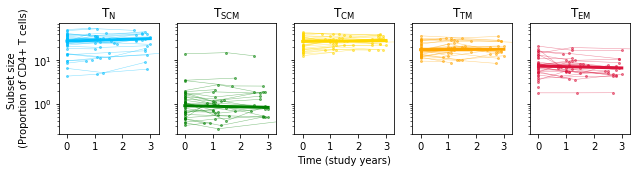

In [26]:
Sx_df=pd.read_csv('data/long_df_Sx.csv')

#info for monolix model
param_df=pd.read_csv('../monolix2/SX_1nodiff/IndividualParameters/estimatedIndividualParameters.txt')
param_df.head()

#plot all subset data relative to study initiation

fig,axarr=plt.subplots(1,5,figsize=(9,2.5),sharex=True,sharey=True)
sim_t = np.linspace(0,3,100)
for ic,ct in enumerate(celltypes):
    ax=axarr[ic]
    for ip,p in enumerate(Sx_df['pat_id'].unique()):
        tdf=Sx_df[(Sx_df['pat_id']==p) & (Sx_df['celltype']==ct)]
        ax.semilogy(tdf['time_postART_years']-tdf['time_postART_years'].iloc[0],tdf['subsetpropSx'],
                    ls='-',marker='o',lw=0.5,markersize=2,alpha=0.5,color=cellcolors[ic])#cz_list[pind])

    avgT0 = np.median(param_df['T'+str(ic+1)+'0_mode'])
    avg_k = np.median(param_df['th'+str(ic+1)+'_mode'])
    ax.plot(sim_t,avgT0*np.exp(avg_k*sim_t),lw=3,color=cellcolors[ic])
        
    ax.set_title(cellnames[ic])

axarr[2].set_xlabel('Time (study years)')
axarr[0].set_ylabel('Subset size \n (Proportion of CD4+ T cells)')
axarr[0].set_xticks(range(5))
axarr[0].set_xlim([-0.3,3.3])

plt.tight_layout()    
plt.savefig('figures/Sx_studyyears.pdf',dpi=600)

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


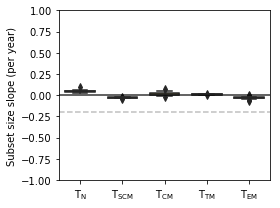

In [27]:
#look at net clearance rates
plt.figure(figsize=(4,3))
sns.boxplot(param_df[monolix_param_names],width=0.7,
               palette=dict(zip(monolix_param_names,cellcolors)))
plt.axhline(0,color='k',alpha=0.8)
plt.axhline(-0.2,color='gray',ls='--',alpha=0.5)
plt.xlim([-.5,4.5])
plt.xticks(range(5),cellnames)
#plt.xticks(range(1,7),celltypes)
plt.ylabel('Subset size slope (per year)')
plt.ylim([-1,1])
plt.tight_layout()

plt.savefig('figures/Sx_rates_box2.pdf',dpi=600)
